In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as st
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv('data/default-of-credit-card-clients.csv')
df_copy = df.copy()

In [3]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
df_copy.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
df_copy.drop('ID',axis=1,inplace=True)

In [6]:
df_copy

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [16]:
df_copy.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
for i in df_copy.columns:
          print(len(df_copy[i].unique()))

81
2
7
4
56
11
11
11
11
10
10
22723
22346
22026
21548
21010
20604
7943
7899
7518
6937
6897
6939
2


In [43]:
df_copy.duplicated().sum()

35

In [44]:
df_copy.drop_duplicates(inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_25196\1419272025.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_copy[df_copy.columns[i]])
C:\Users\Asus\AppData\Local\Temp\ipykernel_25196\1419272025.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_copy[df_copy.columns[i]])
C:\Users\A

num must be an integer with 1 <= num <= 12, not 13


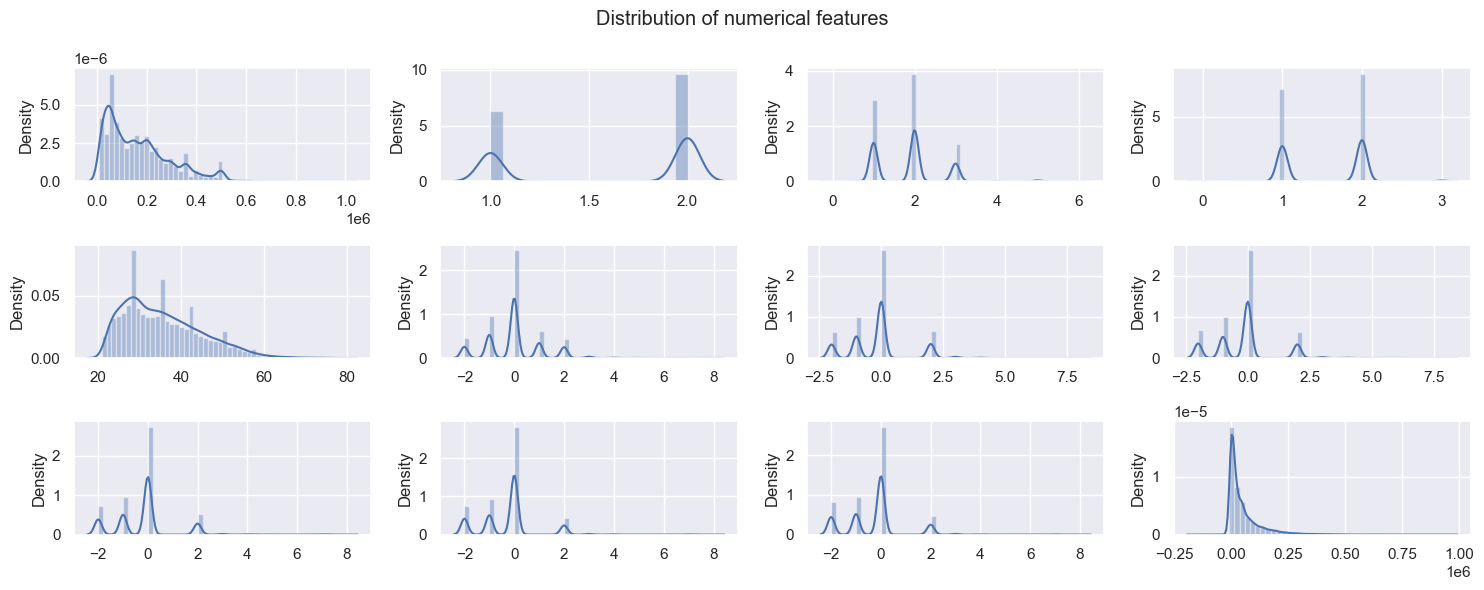

In [18]:
try:
          plt.suptitle("Distribution of numerical features")
          for i in range(0,len(df_copy.columns)):
                    plt.subplot(3,4,i+1)
                    sns.distplot(x=df_copy[df_copy.columns[i]])
                    plt.tight_layout()
except Exception as e:
          print(e)

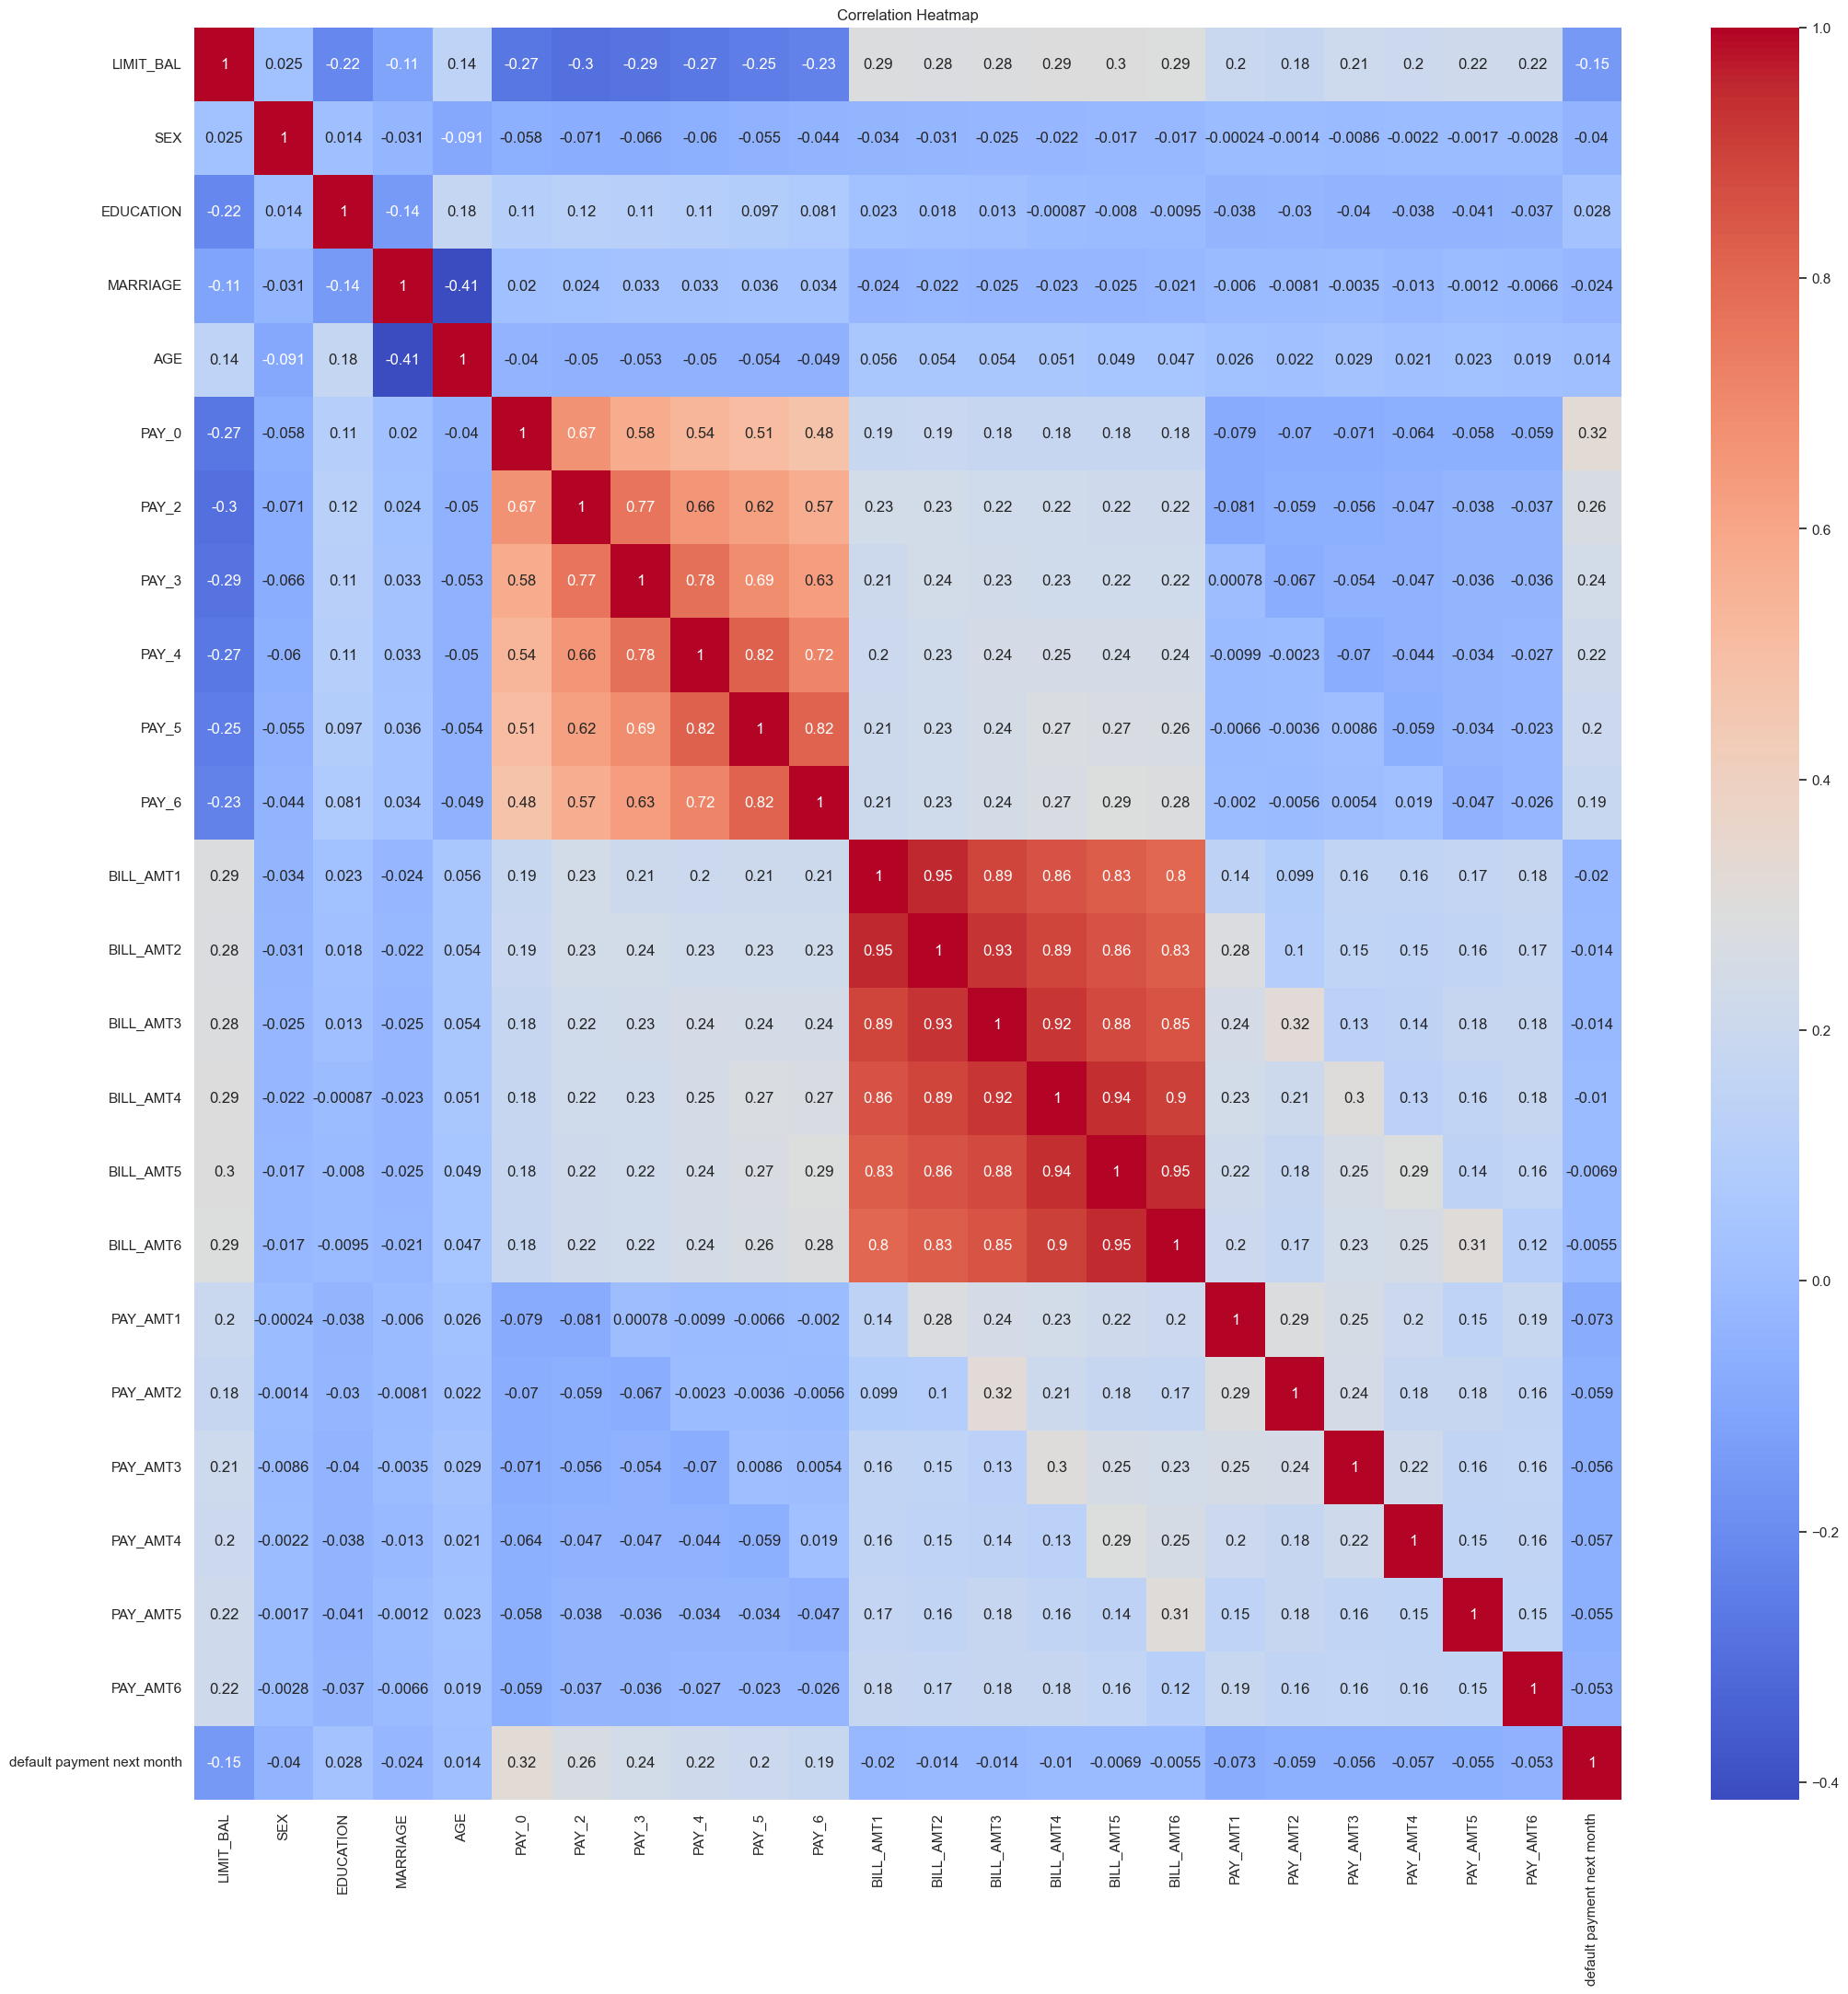

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
import pandas as pd

correlation_matrix = df_copy.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [46]:
LIMIT_BAL = df_copy.groupby("LIMIT_BAL")["default payment next month"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'LIMIT_BAL vs default payment next month'}, xlabel='LIMIT_BAL', ylabel='default payment next month'>

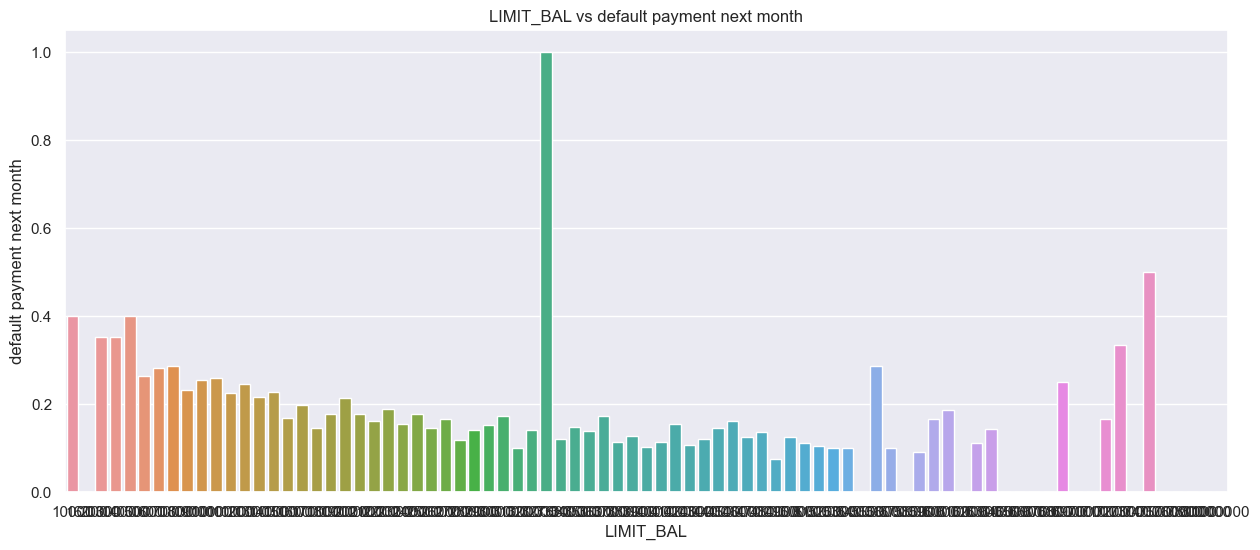

In [47]:
plt.title('LIMIT_BAL vs default payment next month')
sns.barplot(x='LIMIT_BAL',y='default payment next month',data=LIMIT_BAL)

In [24]:
df_copy.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [25]:
SEX = df_copy.groupby("SEX")["default payment next month"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'SEX vs default payment next month'}, xlabel='SEX', ylabel='default payment next month'>

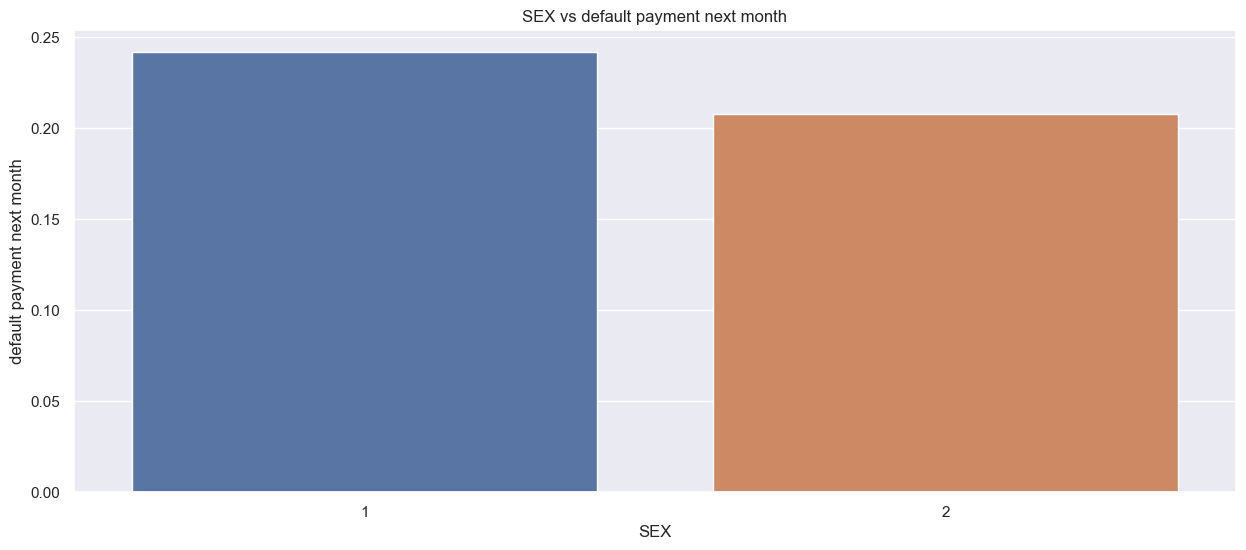

In [26]:
plt.title('SEX vs default payment next month')
sns.barplot(x='SEX',y='default payment next month',data=SEX)

In [27]:
EDUCATION = df_copy.groupby("EDUCATION")["default payment next month"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'EDUCATION vs default payment next month'}, xlabel='EDUCATION', ylabel='default payment next month'>

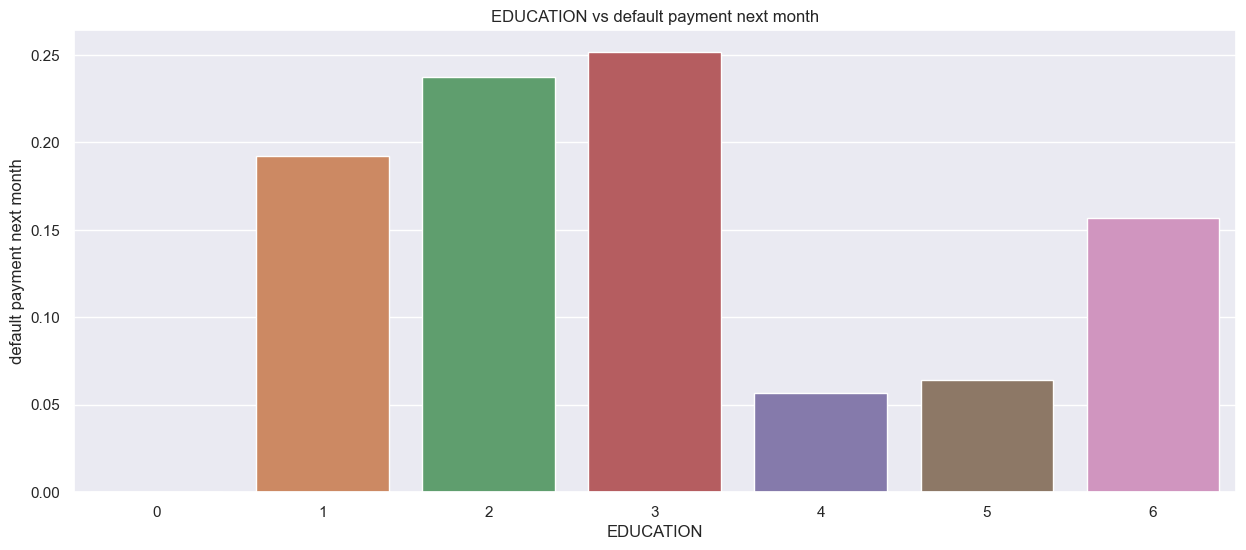

In [28]:
plt.title('EDUCATION vs default payment next month')
sns.barplot(x='EDUCATION',y='default payment next month',data=EDUCATION)

In [29]:
MARRIAGE = df_copy.groupby("MARRIAGE")["default payment next month"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'MARRIAGE vs default payment next month'}, xlabel='MARRIAGE', ylabel='default payment next month'>

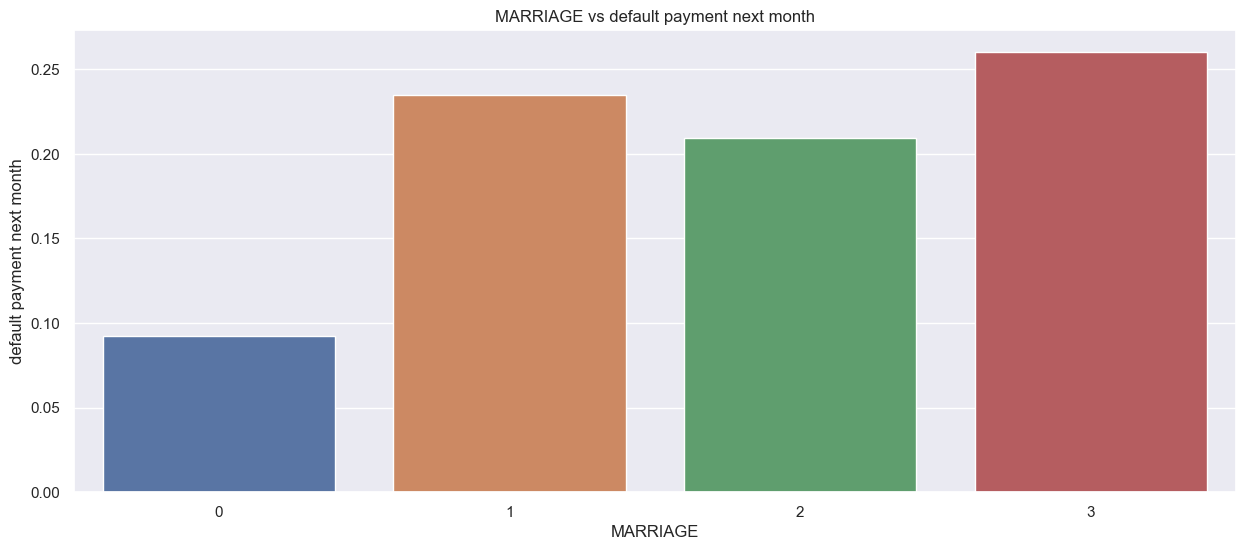

In [30]:
plt.title('MARRIAGE vs default payment next month')
sns.barplot(x='MARRIAGE',y='default payment next month',data=MARRIAGE)

In [32]:
AGE = df_copy.groupby("AGE")["default payment next month"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'AGE vs default payment next month'}, xlabel='AGE', ylabel='default payment next month'>

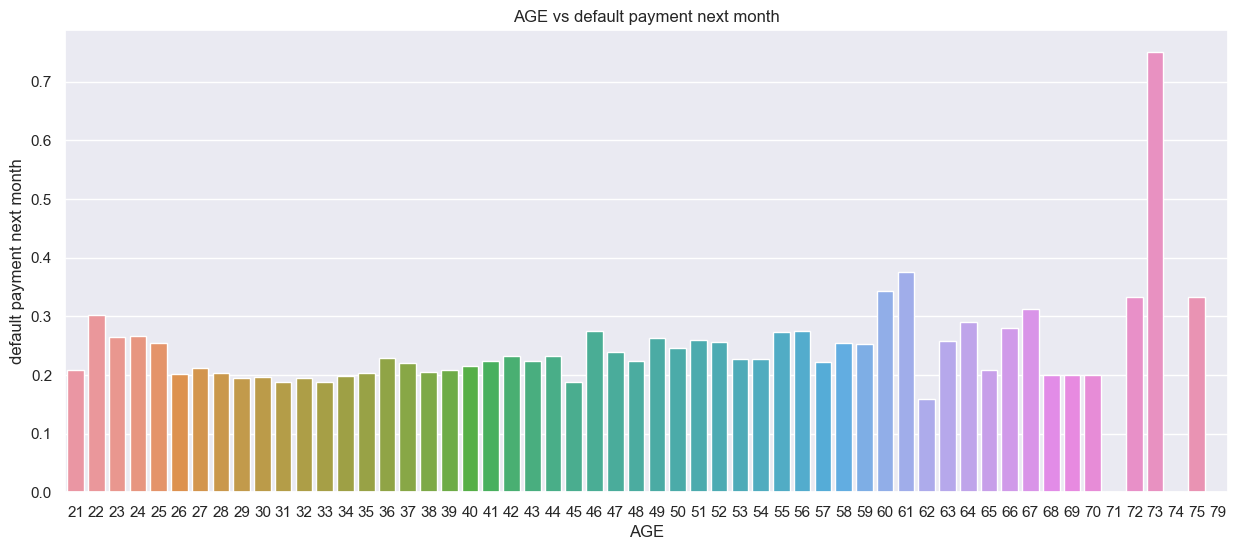

In [33]:
plt.title('AGE vs default payment next month')
sns.barplot(x='AGE',y='default payment next month',data=AGE)

In [35]:
PAY_0 = df_copy.groupby("PAY_0")["default payment next month"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'PAY_0 vs default payment next month'}, xlabel='PAY_0', ylabel='default payment next month'>

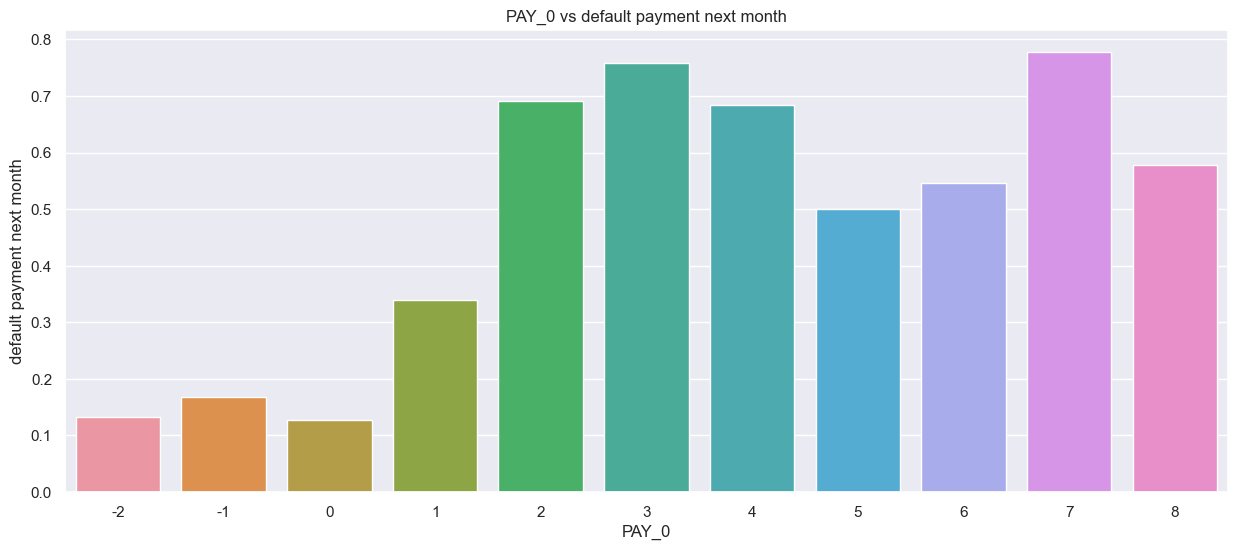

In [36]:
plt.title('PAY_0 vs default payment next month')
sns.barplot(x='PAY_0',y='default payment next month',data=PAY_0)

In [38]:
PAY_2 = df_copy.groupby("PAY_2")["default payment next month"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'PAY_2 vs default payment next month'}, xlabel='PAY_2', ylabel='default payment next month'>

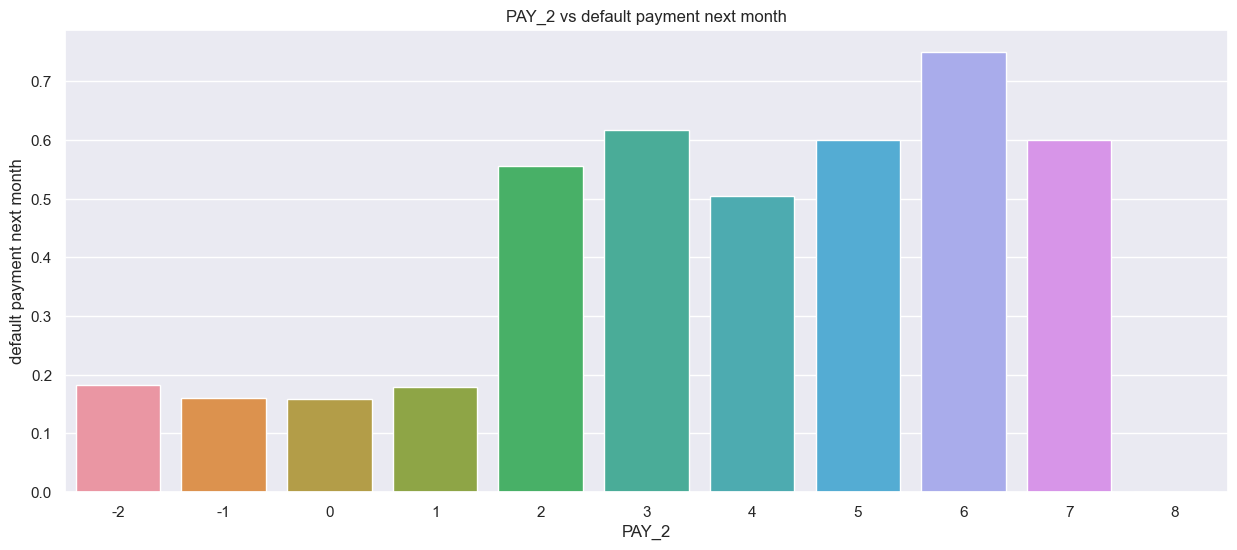

In [39]:
plt.title('PAY_2 vs default payment next month')
sns.barplot(x='PAY_2',y='default payment next month',data=PAY_2)

In [41]:
PAY_3 = df_copy.groupby("PAY_3")["default payment next month"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'PAY_3 vs default payment next month'}, xlabel='PAY_3', ylabel='default payment next month'>

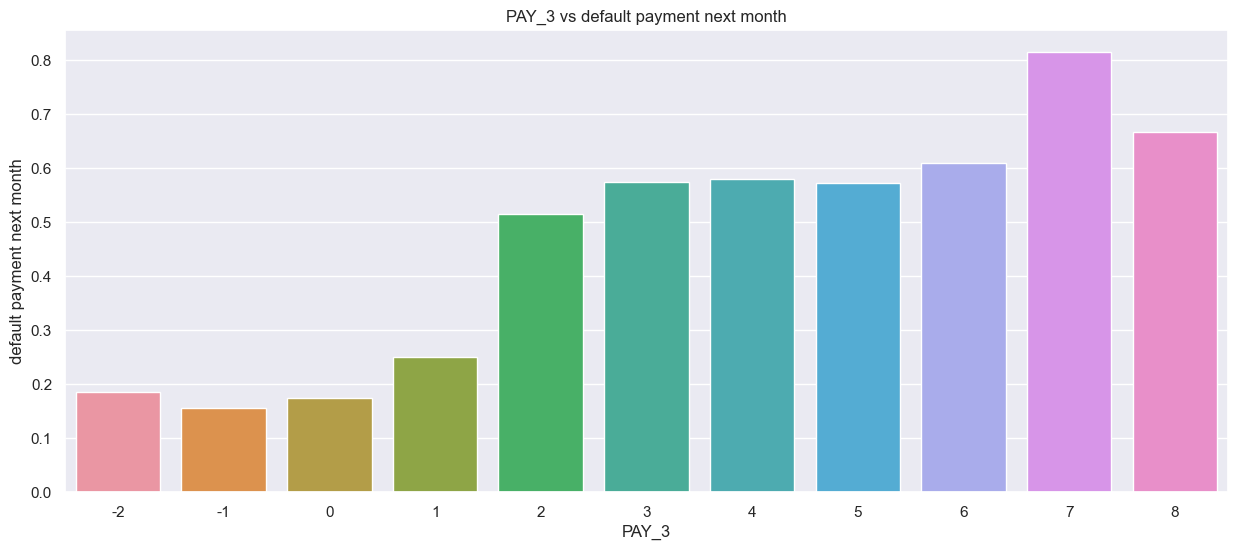

In [42]:
plt.title('PAY_3 vs default payment next month')
sns.barplot(x='PAY_3',y='default payment next month',data=PAY_3)

In [48]:
PAY_4 = df_copy.groupby("PAY_4")["default payment next month"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'PAY_4 vs default payment next month'}, xlabel='PAY_4', ylabel='default payment next month'>

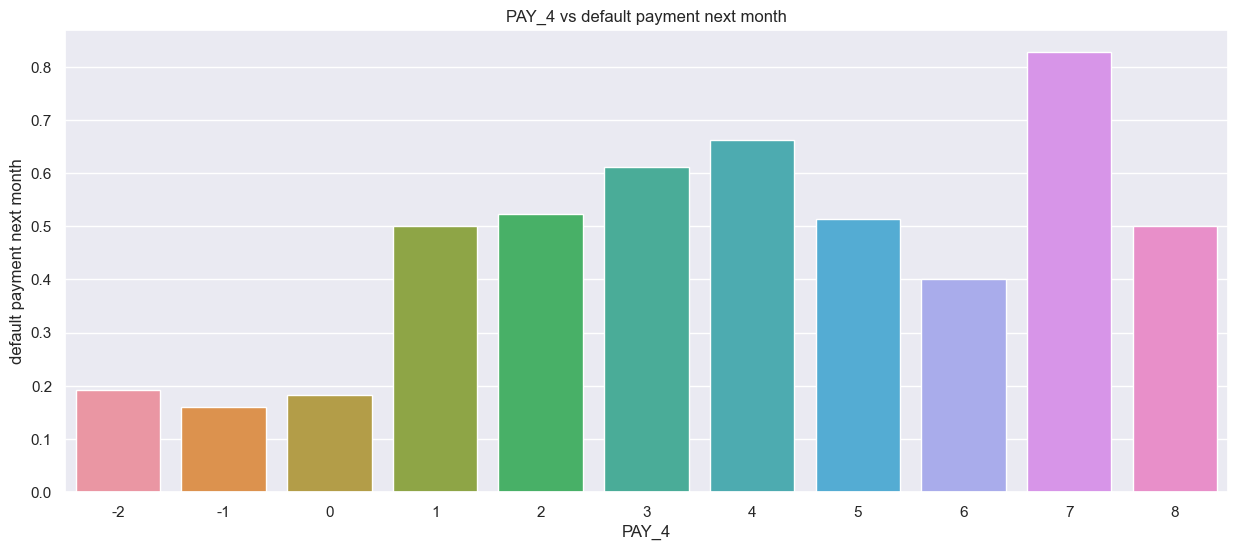

In [49]:
plt.title('PAY_4 vs default payment next month')
sns.barplot(x='PAY_4',y='default payment next month',data=PAY_4)

In [ ]:
# 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
#        'default payment next month'

In [51]:
PAY_5 = df_copy.groupby("PAY_5")["default payment next month"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'PAY_5 vs default payment next month'}, xlabel='PAY_5', ylabel='default payment next month'>

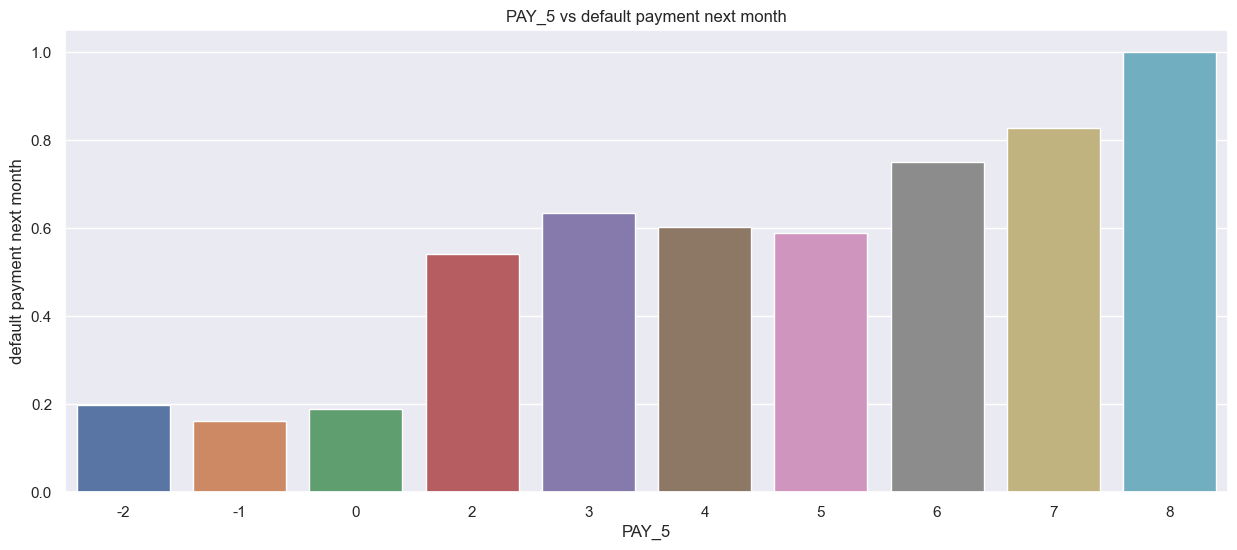

In [52]:
plt.title('PAY_5 vs default payment next month')
sns.barplot(x='PAY_5',y='default payment next month',data=PAY_5)

In [54]:
PAY_6 = df_copy.groupby("PAY_6")["default payment next month"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'PAY_6 vs default payment next month'}, xlabel='PAY_6', ylabel='default payment next month'>

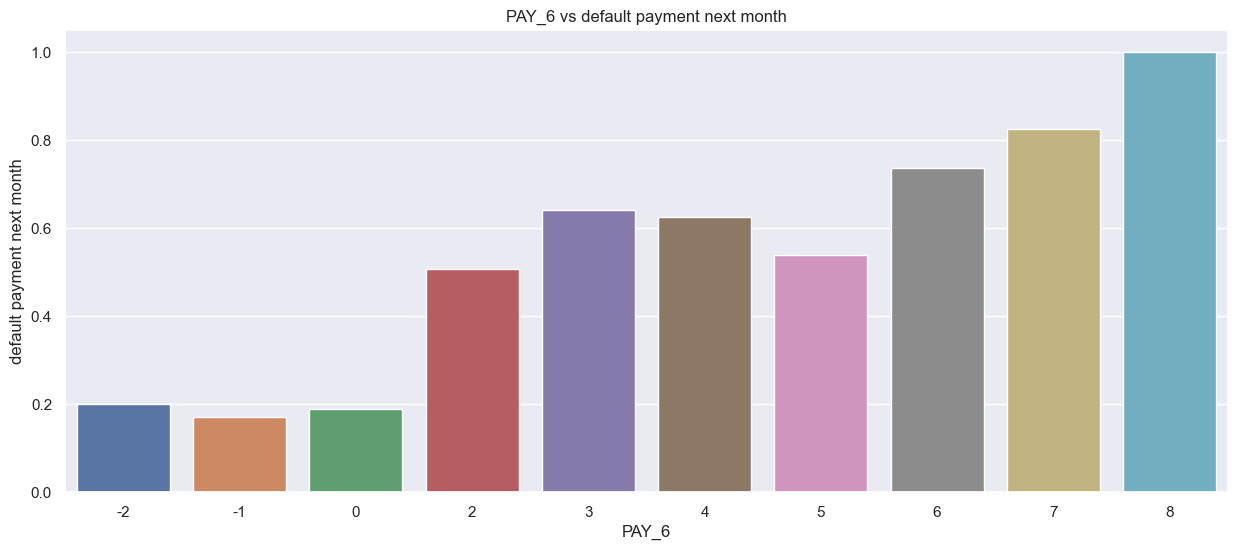

In [55]:
plt.title('PAY_6 vs default payment next month')
sns.barplot(x='PAY_6',y='default payment next month',data=PAY_6)

In [10]:
BILL_AMT1 = df_copy.groupby("BILL_AMT1")["default payment next month"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'BILL_AMT1 vs default payment next month'}, xlabel='BILL_AMT1', ylabel='default payment next month'>

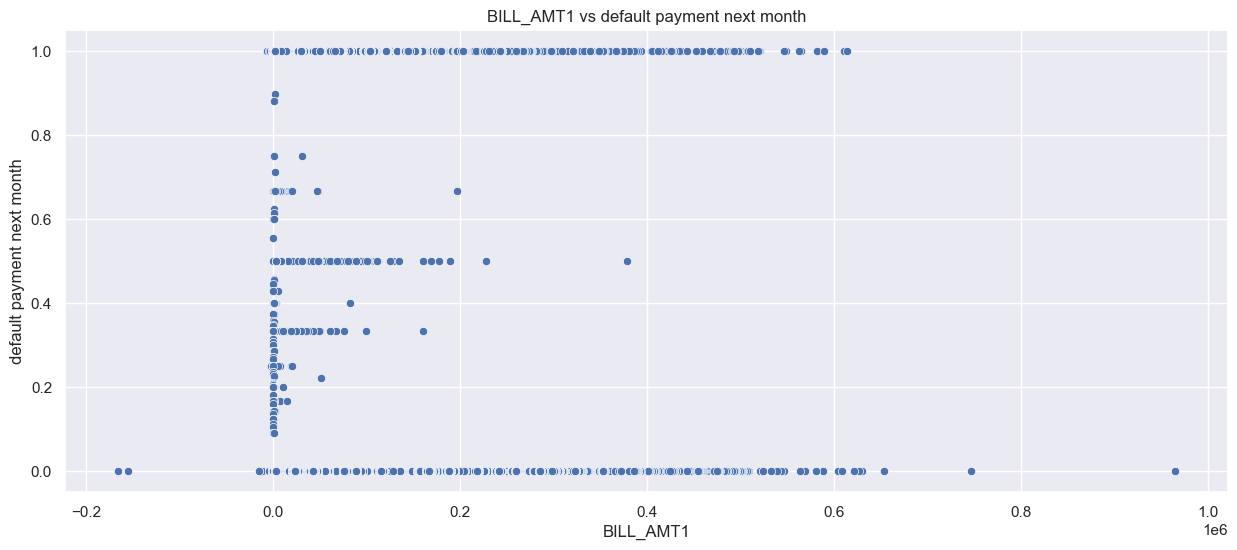

In [12]:
plt.title('BILL_AMT1 vs default payment next month')
sns.scatterplot(x='BILL_AMT1',y='default payment next month',data=BILL_AMT1)

In [36]:
X = df_copy.drop(labels=['default payment next month'],axis=1)
Y = df_copy[['default payment next month']]

In [37]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling

## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [38]:
numerical_columns = X.columns

In [39]:
numerical_columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [40]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_columns)
])


In [41]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.40,random_state=30)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18000 entries, 14533 to 5925
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  18000 non-null  int64
 1   SEX        18000 non-null  int64
 2   EDUCATION  18000 non-null  int64
 3   MARRIAGE   18000 non-null  int64
 4   AGE        18000 non-null  int64
 5   PAY_0      18000 non-null  int64
 6   PAY_2      18000 non-null  int64
 7   PAY_3      18000 non-null  int64
 8   PAY_4      18000 non-null  int64
 9   PAY_5      18000 non-null  int64
 10  PAY_6      18000 non-null  int64
 11  BILL_AMT1  18000 non-null  int64
 12  BILL_AMT2  18000 non-null  int64
 13  BILL_AMT3  18000 non-null  int64
 14  BILL_AMT4  18000 non-null  int64
 15  BILL_AMT5  18000 non-null  int64
 16  BILL_AMT6  18000 non-null  int64
 17  PAY_AMT1   18000 non-null  int64
 18  PAY_AMT2   18000 non-null  int64
 19  PAY_AMT3   18000 non-null  int64
 20  PAY_AMT4   18000 non-null  int64
 21  PAY_AMT5 

In [34]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 7707 to 19998
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  12000 non-null  int64
 1   SEX        12000 non-null  int64
 2   EDUCATION  12000 non-null  int64
 3   MARRIAGE   12000 non-null  int64
 4   AGE        12000 non-null  int64
 5   PAY_0      12000 non-null  int64
 6   PAY_2      12000 non-null  int64
 7   PAY_3      12000 non-null  int64
 8   PAY_4      12000 non-null  int64
 9   PAY_5      12000 non-null  int64
 10  PAY_6      12000 non-null  int64
 11  BILL_AMT1  12000 non-null  int64
 12  BILL_AMT2  12000 non-null  int64
 13  BILL_AMT3  12000 non-null  int64
 14  BILL_AMT4  12000 non-null  int64
 15  BILL_AMT5  12000 non-null  int64
 16  BILL_AMT6  12000 non-null  int64
 17  PAY_AMT1   12000 non-null  int64
 18  PAY_AMT2   12000 non-null  int64
 19  PAY_AMT3   12000 non-null  int64
 20  PAY_AMT4   12000 non-null  int64
 21  PAY_AMT5 

In [43]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18000 entries, 14533 to 5925
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default payment next month  18000 non-null  int64
dtypes: int64(1)
memory usage: 281.2 KB


In [44]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [47]:
model=LogisticRegression()

In [48]:
model.fit(X_train,y_train)

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [49]:
model.score(X_train,y_train)

0.8106111111111111

In [50]:
y_pred=model.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred)

0.814

In [55]:
confusion_matrix(y_test,y_pred)

array([[9122,  269],
       [1963,  646]], dtype=int64)